<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [29]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-07-31 22:45:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  33.3MB/s    in 1.0s    

2022-07-31 22:45:31 (33.3 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [30]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [32]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [33]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [34]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [65]:
#quiz
QUERY = """
SELECT *
FROM DevType
"""
type=pd.read_sql_query(QUERY,conn)

type['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

## Demo: How to describe a table


In [35]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [36]:
# your code goes here
Query_ConvertedComp = """
SELECT ConvertedComp
FROM master
"""
ConvertedComp= pd.read_sql_query(Query_ConvertedComp, conn)

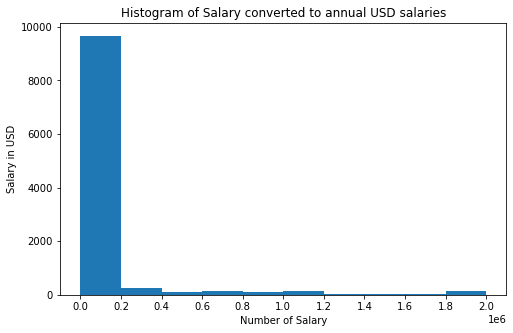

In [37]:
count, bin_edges = np.histogram(ConvertedComp['ConvertedComp'].dropna())

ConvertedComp['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Salary converted to annual USD salaries') # add a title to the histogram
plt.ylabel('Salary in USD') # add y-label
plt.xlabel('Number of Salary') # add x-label

plt.show()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

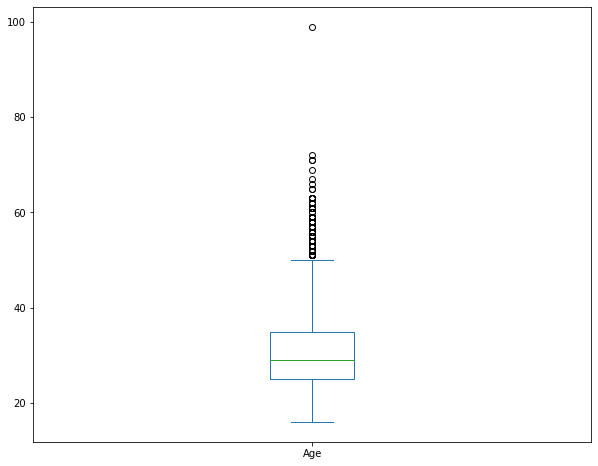

In [38]:
# your code goes here

Query_age = """
SELECT Age
FROM master
"""

Age= pd.read_sql_query(Query_age, conn)
Age.plot(kind='box', figsize=(10, 8))

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

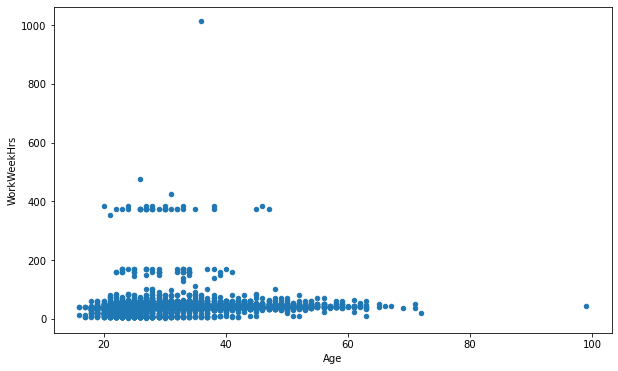

In [39]:
# your code goes here
Query_age_workweekhrs = """
SELECT Age, WorkWeekHrs
FROM master
"""
age_workweekhrs= pd.read_sql_query(Query_age_workweekhrs, conn)


age_workweekhrs.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10,6))

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


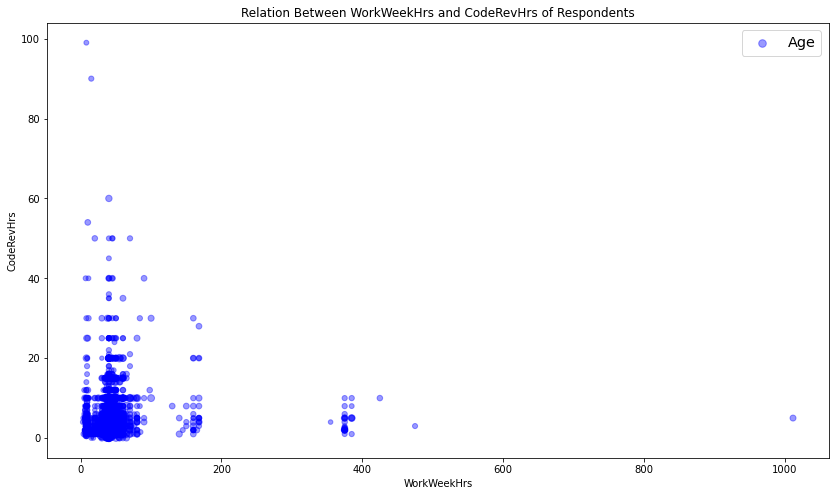

In [40]:
# your code goes here
query_bubble = """
SELECT CodeRevHrs, WorkWeekHrs, Age
FROM master
"""
df_bubble = pd.read_sql_query(query_bubble,conn)
df_bubble.plot(kind='scatter',
               x='WorkWeekHrs',
               y='CodeRevHrs',
               s='Age',
               figsize=(14, 8),
               alpha=0.4,  # transparency
               color='blue'
               )

plt.title('Relation Between WorkWeekHrs and CodeRevHrs of Respondents')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend(['Age'], loc='upper right', fontsize='x-large')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [41]:
# your code goes here

query_pie="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5"""

df_pie=pd.read_sql_query(query_pie,conn)
df_pie

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


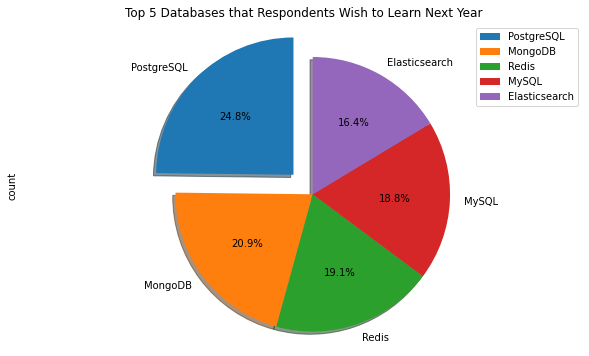

In [42]:
#df_pie.shape
label=df_pie['DatabaseDesireNextYear']
myexplode=[0.2,0,0,0,0]
df_pie['count'].plot(kind='pie',
                          figsize=(10, 6),
                          autopct='%1.1f%%', # add in percentages
                          startangle=90,     # start angle 90°
                          shadow=True,       # add shadow
                          explode=myexplode,
                          labels=label
                          )

plt.title('Top 5 Databases that Respondents Wish to Learn Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend()
plt.show()

In [46]:
#quiz
query_lan="""
SELECT LanguageWorkedWith, count(*) as count
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count desc limit 5"""

df_lan=pd.read_sql_query(query_lan,conn)
df_lan

,LanguageWorkedWith,count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [62]:
#quiz
query_sql="""
SELECT *
FROM DatabaseWorkedWith"""
df_sql=pd.read_sql_query(query_sql,conn)
resp_sum = df_sql.groupby('Respondent').sum()
resp_sum[resp_sum['DatabaseWorkedWith']=='MySQL'].count()

DatabaseWorkedWith    474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [209]:
# your code goes here

query_stacked="""
select WorkWeekHrs,CodeRevHrs,age from master
where age between 30 and 35
group by age
order by age"""

df_stacked=pd.read_sql_query(query_stacked,conn)
df_stacked

,WorkWeekHrs,CodeRevHrs,Age
0,40.0,5.0,30.0
1,8.0,3.0,31.0
2,40.0,2.0,32.0
3,40.0,2.0,33.0
4,40.0,2.0,34.0
5,38.0,2.0,35.0


In [210]:
df_stacked=df_stacked.groupby('Age')[['CodeRevHrs','WorkWeekHrs']].median()
df_stacked

,CodeRevHrs,WorkWeekHrs
Age,,
30.0,5.0,40.0
31.0,3.0,8.0
32.0,2.0,40.0
33.0,2.0,40.0
34.0,2.0,40.0
35.0,2.0,38.0


Text(0.5, 1.0, 'a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')

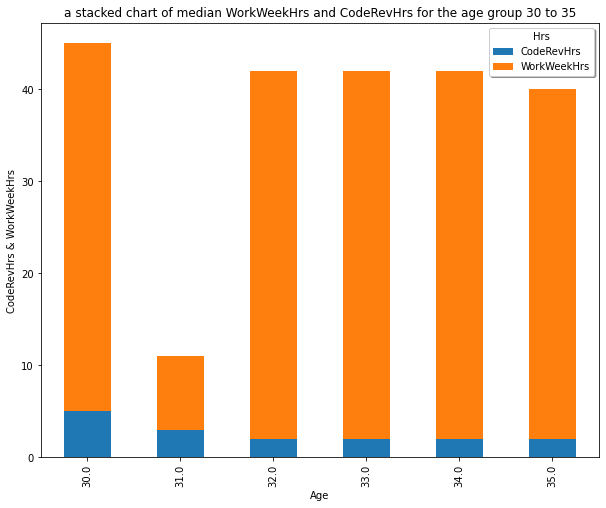

In [211]:
df_stacked.plot.bar(stacked=True,figsize=(10,8))
plt.ylabel('CodeRevHrs & WorkWeekHrs')
plt.legend(shadow=True, title='Hrs')
plt.title('a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
#for i in range(5):
#    plt.annotate(str(df_stacked['CodeRevHrs'].to_list()[i]), xy=(float(df_stacked.index[i]),float(df_stacked['CodeRevHrs'].to_list()[i])))
#for i in range(5):
#    plt.annotate(str(df_stacked['WorkWeekHrs'].to_list()[i]), xy=(float(df_stacked.index[i]),float(df_stacked['WorkWeekHrs'].to_list()[i])), ha='center', va='bottom')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [69]:
# your code goes here

query_line="""
select ConvertedComp,age from master
where age between 45 and 60
group by age
order by age"""

df_line=pd.read_sql_query(query_line,conn)
df_line

,ConvertedComp,Age
0,72522.0,45.0
1,118000.0,46.0
2,103000.0,47.0
3,25980.0,48.0
4,110509.0,49.0
5,115000.0,50.0
6,89212.0,51.0
7,135000.0,52.0
8,105000.0,53.0
9,NaN,54.0


In [71]:
#quiz
df_line.corr()

,ConvertedComp,Age
ConvertedComp,1.000000,0.371475
Age,0.371475,1.000000


In [213]:
df_line=df_line.groupby('Age')[['ConvertedComp']].median()
df_line

,ConvertedComp
Age,
45.0,72522.0
46.0,118000.0
47.0,103000.0
48.0,25980.0
49.0,110509.0
50.0,115000.0
51.0,89212.0
52.0,135000.0
53.0,105000.0


Text(0.5, 1.0, 'a line chart of median ConvertedComp for the age group 45 to 60')

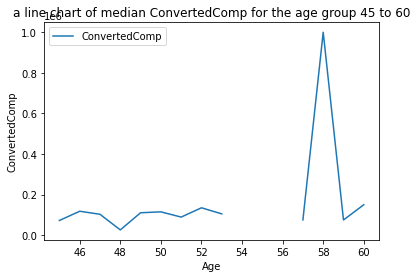

In [214]:
df_line.plot(kind='line')
plt.ylabel('ConvertedComp')
plt.title('a line chart of median ConvertedComp for the age group 45 to 60')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [228]:
# your code goes here

Query_bar="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
MainBranch=pd.read_sql_query(Query_bar, conn)
MainBranch

,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


<AxesSubplot:>

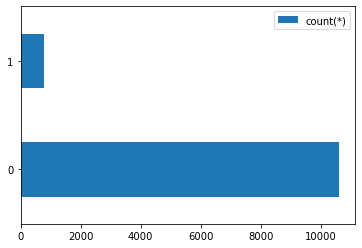

In [229]:
MainBranch.plot(kind='barh')


Close the database connection.


In [230]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
